## This workbook includes the following:

##### - Function creating a GeoJSON file from cycling crash data csv file based on user input relating to severity of a crash.

The data was sourced from the ACT Government website and can be found at https://www.data.act.gov.au/Justice-Safety-and-Emergency/Cyclist-Crashes/n2kg-qkwj.
The data is licensed under Creative Commons 4.0 International. More information can be found at https://creativecommons.org/licenses/by/4.0/legalcode.

##### - Analysis and plotting of original csv file and plotting of queried data matching function input.

##### - Function to create GeoJSON file based on clustered results.

This is the main function:

In [25]:
import geojson
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, time
%matplotlib inline
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from shapely.geometry import MultiPoint


def crash(userinput):
    
    crashData = pd.read_csv('CyclistCrashes.csv')

    crashData["timestamp"] = crashData["CRASH_DATE"].map(str) + ' ' + crashData["CRASH_TIME"]

    crashData['timestamp'] =  pd.to_datetime(crashData['timestamp'])
    
    severityData = crashData[crashData["SEVERITY"] == (userinput)]
        
    features = []
    insert_features = lambda X: features.append(
        geojson.Feature(geometry=geojson.Point((X["LONGITUDE"],
                                                    X["LATITUDE"],)),
                                                    
                            properties=dict(
                                Date=X["CRASH_DATE"],
                                Location=X["REPORTED_LOCATION"],
                                Type=X["CRASH_TYPE"],
                                Time=X["CRASH_TIME"],
                                Severity=X["SEVERITY"],
                            )))
    severityData.apply(insert_features, axis=1)
    with open('severityData.geojson', 'w', encoding='utf8') as fp:
        geojson.dump(geojson.FeatureCollection(features), fp, sort_keys=True, ensure_ascii=False)

    import geopandas as gpd
    test = gpd.read_file('severityData.geojson')
        
    buffer = test.copy()
    buffer.geometry = buffer['geometry'].buffer(0.005)
  
    buffer.to_file('testBUFF.shp')
        
crash('Injury')

In [14]:
import geopandas as gpd
test = gpd.read_file('severityData.geojson')
test.head()

Exception ignored in: <object repr() failed>
Traceback (most recent call last):
  File "C:\Users\jayde\Anaconda3\lib\site-packages\fiona\collection.py", line 426, in __del__
    self.close()
  File "C:\Users\jayde\Anaconda3\lib\site-packages\fiona\collection.py", line 401, in close
    if self.session is not None:
AttributeError: 'Collection' object has no attribute 'session'


Date                                           Location Severity  \
0  14-May-12  CAPITAL CIRCLE (COMMONWEALTH/COMMSPARLERM -> C...   Injury   
1  20-Feb-13                  MORPHETT/NORTHBOURNE INTERSECTION   Injury   
2  17-Mar-14                BUNDA/NORTHBOURNE/RUDD INTERSECTION   Injury   
3  26-Apr-14            TELOPEA/WENTWORTH/EASTLAKE INTERSECTION   Injury   
4   3-Feb-12           STONEHAVEN/MELBOURNE/GOWRIE INTERSECTION   Injury   

       Time                              Type  \
0  12:37:00     Collision with parked vehicle   
1  07:57:00  Right turn into oncoming vehicle   
2  07:30:00         Same direction side swipe   
3  11:00:00             Right angle collision   
4  05:50:00        Other - Vehicle to Vehicle   

                                geometry  
0          POINT (149.125419 -35.304932)  
1          POINT (149.133358 -35.253575)  
2  POINT (149.129453 -35.27713499999999)  
3          POINT (149.141787 -35.311098)  
4  POINT (149.114493 -35.31935900000001)

In [22]:
buffer = test.copy()
buffer.geometry = buffer['geometry'].buffer(0.005)
buffer.head()

Date                                           Location Severity  \
0  14-May-12  CAPITAL CIRCLE (COMMONWEALTH/COMMSPARLERM -> C...   Injury   
1  20-Feb-13                  MORPHETT/NORTHBOURNE INTERSECTION   Injury   
2  17-Mar-14                BUNDA/NORTHBOURNE/RUDD INTERSECTION   Injury   
3  26-Apr-14            TELOPEA/WENTWORTH/EASTLAKE INTERSECTION   Injury   
4   3-Feb-12           STONEHAVEN/MELBOURNE/GOWRIE INTERSECTION   Injury   

       Time                              Type  \
0  12:37:00     Collision with parked vehicle   
1  07:57:00  Right turn into oncoming vehicle   
2  07:30:00         Same direction side swipe   
3  11:00:00             Right angle collision   
4  05:50:00        Other - Vehicle to Vehicle   

                                            geometry  
0  POLYGON ((149.130419 -35.304932, 149.130394923...  
1  POLYGON ((149.138358 -35.253575, 149.138333923...  
2  POLYGON ((149.134453 -35.27713499999999, 149.1...  
3  POLYGON ((149.146787 -35.311098, 149.146762923...  
4  POLYGON ((149.119493 -35.31935900000001, 149.1...

In [23]:
buffer.to_file('sevBuffer.shp')

In [6]:
import json
from shapely.geometry import shape
with open('severityData.geojson') as geojson_file:    
     sevBuff = json.load(geojson_file)

In [13]:
sevBuff.head()

AttributeError: 'dict' object has no attribute 'head'

In [11]:
for feat in features:
    # transform to Shapely geometry (shape) and buffer
    result = shape((feat['geometry']).buffer(1))

NameError: name 'features' is not defined

In [5]:
from shapely.geometry import mapping, shape
from fiona import collection

with collection("severityData.geojson", "r") as input:
    with collection(
        "sevData_buffer.geojson", "w") as output:
        for point in input:
            output.write({
                'properties': {
                    'name': point['properties']['name']
                }
                'geometry'= point.((X["LONGITUDE"],X["LATITUDE"],)).buffer(0.5))
            })

SyntaxError: invalid syntax (<ipython-input-5-d3565c1fa8a8>, line 12)

In [ ]:
 with collection(
        "some_buffer.shp", "w", "ESRI Shapefile", schema) as output:
        for point in input:
            output.write({
                'properties': {
                    'name': point['properties']['name']
                },
                'geometry': mapping(shape(point['geometry']).buffer(5.0))
            })

Analysis and plotting of original csv file

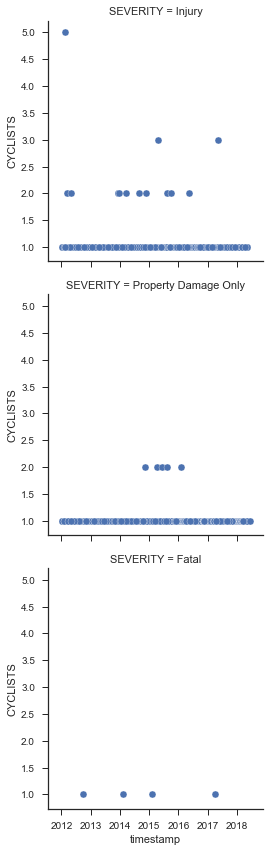

In [93]:
sns.set(style="ticks", color_codes=True)

g = sns.FacetGrid(crashData,row='SEVERITY',size=4)

g.map(plt.scatter, "timestamp", "CYCLISTS",edgecolor="w")

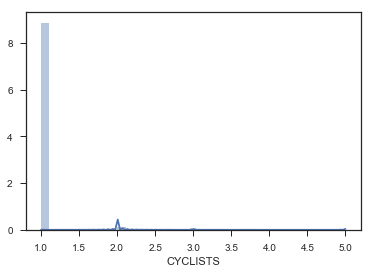

In [94]:
sns.distplot(crashData.CYCLISTS)

Analysis and plotting of queried data matching function input.

In [95]:
crashData = pd.read_csv('CyclistCrashes.csv')
crashData["timestamp"] = crashData["CRASH_DATE"].map(str) + ' ' + crashData["CRASH_TIME"]
crashData['timestamp'] =  pd.to_datetime(crashData['timestamp'])
severityData = crashData[crashData["SEVERITY"] == ('Injury')]

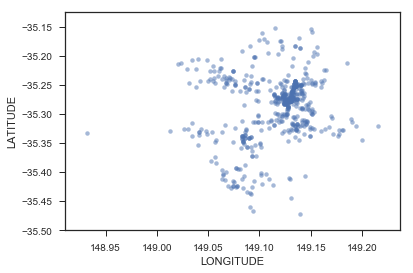

In [96]:
severityData = severityData.sort_values(by=['LATITUDE', 'LONGITUDE'])
ax = severityData.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=0.5, linewidth=0)

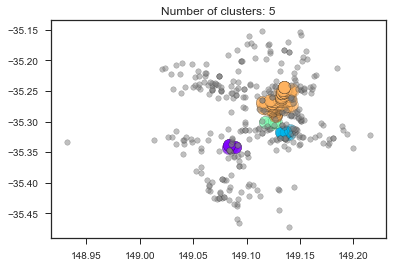

In [97]:
kms_per_radian = 6371.0088
coords = severityData.as_matrix(columns=['LATITUDE', 'LONGITUDE'])
epsilon = 0.5 / kms_per_radian
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
unique_labels = set(cluster_labels)
num_clusters = len(set(cluster_labels))

fig, ax = plt.subplots()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
for cluster_label, color in zip(unique_labels, colors):
    size = 150
    if cluster_label == -1: 
            color = 'gray'
            size = 30
    x_coords = coords[cluster_labels==cluster_label][:,1]
    y_coords = coords[cluster_labels==cluster_label][:,0]
    ax.scatter(x=x_coords, y=y_coords, c=color, edgecolor='k', s=size, alpha=0.5)

ax.set_title('Number of clusters: {}'.format(num_clusters))
plt.show()

Attempt at a function to extract clusters into seperate GeoJSON file: